In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
import geopandas as gpd
import folium

In [2]:
calls = pd.read_excel('data/partners_in_care_data_cleaned.xlsx', sheet_name=1)
calls

,Month,Precinct,Date,Created,Address,Incident Type,Priority
0,July,C,07-01-2021,01:57:16,639 LAFAYETTE ST,INTOXICATED PERSON,2
1,July,C,07-01-2021,03:02:52,920 BROADWAY,WELFARE CHECK,2
2,July,C,07-01-2021,05:44:47,110 4TH AVE S,DISORDERLY SUBJECT,2
3,July,C,07-01-2021,05:49:07,800 4TH AVE S,SUSPICIOUS PERSON,2
4,July,C,07-01-2021,08:01:06,1033 DEMONBREUN ST,TRESPASSER,2
...,...,...,...,...,...,...,...
48015,March,W,03-31-2022,11:46:52,3811 HILLSBORO PIKE,TRESPASSER,2
48016,March,W,03-31-2022,12:24:06,7277 CHARLOTTE PIKE,SUICIDAL PERSON,2
48017,March,W,03-31-2022,17:59:25,MURPHY RD / 42ND AVE N,DISORDERLY SUBJECT,2
48018,March,W,03-31-2022,20:31:47,2828 KENWAY RD,SUSPICIOUS PERSON,2


In [3]:
drop_list = list(calls[calls['Precinct'] == 'Total'].reset_index()['index'])
calls = calls.drop(labels=drop_list, axis=0)

In [4]:
geocodes = pd.read_csv('data/geocodes.csv')

In [5]:
calls = calls.merge(geocodes, how='left', left_on='Address', right_on='address').drop(columns=['address'])

In [6]:
type_summary = pd.read_excel('data/partners_in_care_data_cleaned.xlsx', sheet_name=2)

In [7]:
type_summary['Total'] = type_summary['ASSIST EMS'] + type_summary['DISORDERLY SUBJECT'] + type_summary['DOMESTIC DISTURBANCE'] + type_summary['INTOXICATED PERSON'] + type_summary['MENTAL CONDITION'] + type_summary['SUICIDAL PERSON'] + type_summary['SUSPICIOUS PERSON'] + type_summary['TRESPASSER'] + type_summary['WELFARE CHECK']

In [8]:
type_summary

,Month,Precinct,ASSIST EMS,DISORDERLY SUBJECT,DOMESTIC DISTURBANCE,INTOXICATED PERSON,MENTAL CONDITION,SUICIDAL PERSON,SUSPICIOUS PERSON,TRESPASSER,WELFARE CHECK,Total
0,August,C,203,354,11,7,28,43,18,104,85,853
1,August,CMD1,0,1,0,0,0,0,0,0,0,1
2,August,CW,3,8,0,0,1,1,1,3,2,19
3,August,E,91,187,56,3,13,16,44,33,88,531
4,August,H,190,310,64,5,28,31,69,68,190,955
...,...,...,...,...,...,...,...,...,...,...,...,...
91,March,MT,149,199,31,7,10,21,53,49,140,659
92,March,N,122,209,35,1,24,26,34,53,119,623
93,March,S,198,286,59,3,27,29,42,66,236,946
94,March,W,87,131,11,4,12,14,46,36,103,444


In [9]:
priority_summary = pd.read_excel('data/partners_in_care_data_cleaned.xlsx', sheet_name=3)
priority_summary

,Month,Precinct,Priority-1,Priority-2,Priority-2L,Priority-2M,Priority-2N,Priority-2T,Priority-3,Priority-3H,Priority-3M,Priority-3Q,Total
0,August,C,2,578,0,251,0,0,21,0.0,1,0,853
1,August,CMD1,0,0,0,1,0,0,0,0.0,0,0,1
2,August,CW,0,2,0,17,0,0,0,0.0,0,0,19
3,August,E,0,391,0,126,0,0,12,0.0,2,0,531
4,August,H,0,729,0,190,0,0,32,0.0,4,0,955
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,March,MT,0,431,0,217,0,0,11,0.0,0,0,659
92,March,N,0,448,0,139,0,0,33,0.0,3,0,623
93,March,S,1,685,0,220,0,0,40,0.0,0,0,946
94,March,W,0,294,0,132,0,0,16,NaN,2,0,444


In [10]:
calls

,Month,Precinct,Date,Created,Address,Incident Type,Priority,lat,lng
0,July,C,07-01-2021,01:57:16,639 LAFAYETTE ST,INTOXICATED PERSON,2,36.152611,-86.777416
1,July,C,07-01-2021,03:02:52,920 BROADWAY,WELFARE CHECK,2,36.158728,-86.784247
2,July,C,07-01-2021,05:44:47,110 4TH AVE S,DISORDERLY SUBJECT,2,36.160629,-86.776459
3,July,C,07-01-2021,05:49:07,800 4TH AVE S,SUSPICIOUS PERSON,2,36.152299,-86.771025
4,July,C,07-01-2021,08:01:06,1033 DEMONBREUN ST,TRESPASSER,2,36.154721,-86.784396
...,...,...,...,...,...,...,...,...,...
48007,March,W,03-31-2022,11:46:52,3811 HILLSBORO PIKE,TRESPASSER,2,36.107374,-86.813413
48008,March,W,03-31-2022,12:24:06,7277 CHARLOTTE PIKE,SUICIDAL PERSON,2,36.119899,-86.916065
48009,March,W,03-31-2022,17:59:25,MURPHY RD / 42ND AVE N,DISORDERLY SUBJECT,2,NaN,NaN
48010,March,W,03-31-2022,20:31:47,2828 KENWAY RD,SUSPICIOUS PERSON,2,NaN,NaN


In [11]:
july_df = calls[calls['Month'] == 'July']
august_df = calls[calls['Month'] == 'August']
september_df = calls[calls['Month'] == 'September']
october_df = calls[calls['Month'] == 'October']
november_df = calls[calls['Month'] == 'November']
december_df = calls[calls['Month'] == 'December']
january_df = calls[calls['Month'] == 'January']
february_df = calls[calls['Month'] == 'February']
march_df = calls[calls['Month'] == 'March']

In [12]:
precinct_list = list(calls.Precinct.unique())
print(len(precinct_list))
precinct_list

12


['C', 'CMD1', 'CW', 'E', 'H', 'M', 'MT', 'N', 'S', 'W', 'PCW', 'CMD2']

In [13]:
c_df = calls[calls['Precinct'] == 'C']
cmd1_df = calls[calls['Precinct'] == 'CMD1']
cw_df = calls[calls['Precinct'] == 'CW']
e_df = calls[calls['Precinct'] == 'E']
h_df = calls[calls['Precinct'] == 'H']
m_df = calls[calls['Precinct'] == 'M']
mt_df = calls[calls['Precinct'] == 'MT']
n_df = calls[calls['Precinct'] == 'N']
s_df = calls[calls['Precinct'] == 'S']
w_df = calls[calls['Precinct'] == 'W']
pcw_df = calls[calls['Precinct'] == 'PCW']
cmd2_df = calls[calls['Precinct'] == 'CMD2']

In [14]:
calls

,Month,Precinct,Date,Created,Address,Incident Type,Priority,lat,lng
0,July,C,07-01-2021,01:57:16,639 LAFAYETTE ST,INTOXICATED PERSON,2,36.152611,-86.777416
1,July,C,07-01-2021,03:02:52,920 BROADWAY,WELFARE CHECK,2,36.158728,-86.784247
2,July,C,07-01-2021,05:44:47,110 4TH AVE S,DISORDERLY SUBJECT,2,36.160629,-86.776459
3,July,C,07-01-2021,05:49:07,800 4TH AVE S,SUSPICIOUS PERSON,2,36.152299,-86.771025
4,July,C,07-01-2021,08:01:06,1033 DEMONBREUN ST,TRESPASSER,2,36.154721,-86.784396
...,...,...,...,...,...,...,...,...,...
48007,March,W,03-31-2022,11:46:52,3811 HILLSBORO PIKE,TRESPASSER,2,36.107374,-86.813413
48008,March,W,03-31-2022,12:24:06,7277 CHARLOTTE PIKE,SUICIDAL PERSON,2,36.119899,-86.916065
48009,March,W,03-31-2022,17:59:25,MURPHY RD / 42ND AVE N,DISORDERLY SUBJECT,2,NaN,NaN
48010,March,W,03-31-2022,20:31:47,2828 KENWAY RD,SUSPICIOUS PERSON,2,NaN,NaN


In [15]:
df_list = [calls, july_df, august_df, september_df, october_df, november_df, december_df, january_df, february_df, march_df, c_df, cmd1_df, cw_df, e_df, h_df, m_df, mt_df, n_df, s_df, w_df, pcw_df, cmd2_df]

In [16]:
for df in df_list:
    df['Date'] = pd.to_datetime(df['Date'])
    df['Created'] = pd.to_datetime(df['Created'])

C:\Users\cocat\AppData\Local\Temp\ipykernel_25540\1437254258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\cocat\AppData\Local\Temp\ipykernel_25540\1437254258.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Created'] = pd.to_datetime(df['Created'])
C:\Users\cocat\AppData\Local\Temp\ipykernel_25540\1437254258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

C:\Users\cocat\AppData\Local\Temp\ipykernel_25540\1437254258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\cocat\AppData\Local\Temp\ipykernel_25540\1437254258.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Created'] = pd.to_datetime(df['Created'])
C:\Users\cocat\AppData\Local\Temp\ipykernel_25540\1437254258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [17]:
type_summary

,Month,Precinct,ASSIST EMS,DISORDERLY SUBJECT,DOMESTIC DISTURBANCE,INTOXICATED PERSON,MENTAL CONDITION,SUICIDAL PERSON,SUSPICIOUS PERSON,TRESPASSER,WELFARE CHECK,Total
0,August,C,203,354,11,7,28,43,18,104,85,853
1,August,CMD1,0,1,0,0,0,0,0,0,0,1
2,August,CW,3,8,0,0,1,1,1,3,2,19
3,August,E,91,187,56,3,13,16,44,33,88,531
4,August,H,190,310,64,5,28,31,69,68,190,955
...,...,...,...,...,...,...,...,...,...,...,...,...
91,March,MT,149,199,31,7,10,21,53,49,140,659
92,March,N,122,209,35,1,24,26,34,53,119,623
93,March,S,198,286,59,3,27,29,42,66,236,946
94,March,W,87,131,11,4,12,14,46,36,103,444


In [18]:
priority_summary

,Month,Precinct,Priority-1,Priority-2,Priority-2L,Priority-2M,Priority-2N,Priority-2T,Priority-3,Priority-3H,Priority-3M,Priority-3Q,Total
0,August,C,2,578,0,251,0,0,21,0.0,1,0,853
1,August,CMD1,0,0,0,1,0,0,0,0.0,0,0,1
2,August,CW,0,2,0,17,0,0,0,0.0,0,0,19
3,August,E,0,391,0,126,0,0,12,0.0,2,0,531
4,August,H,0,729,0,190,0,0,32,0.0,4,0,955
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,March,MT,0,431,0,217,0,0,11,0.0,0,0,659
92,March,N,0,448,0,139,0,0,33,0.0,3,0,623
93,March,S,1,685,0,220,0,0,40,0.0,0,0,946
94,March,W,0,294,0,132,0,0,16,NaN,2,0,444


In [19]:
calls

,Month,Precinct,Date,Created,Address,Incident Type,Priority,lat,lng
0,July,C,2021-07-01,2022-04-11 01:57:16,639 LAFAYETTE ST,INTOXICATED PERSON,2,36.152611,-86.777416
1,July,C,2021-07-01,2022-04-11 03:02:52,920 BROADWAY,WELFARE CHECK,2,36.158728,-86.784247
2,July,C,2021-07-01,2022-04-11 05:44:47,110 4TH AVE S,DISORDERLY SUBJECT,2,36.160629,-86.776459
3,July,C,2021-07-01,2022-04-11 05:49:07,800 4TH AVE S,SUSPICIOUS PERSON,2,36.152299,-86.771025
4,July,C,2021-07-01,2022-04-11 08:01:06,1033 DEMONBREUN ST,TRESPASSER,2,36.154721,-86.784396
...,...,...,...,...,...,...,...,...,...
48007,March,W,2022-03-31,2022-04-11 11:46:52,3811 HILLSBORO PIKE,TRESPASSER,2,36.107374,-86.813413
48008,March,W,2022-03-31,2022-04-11 12:24:06,7277 CHARLOTTE PIKE,SUICIDAL PERSON,2,36.119899,-86.916065
48009,March,W,2022-03-31,2022-04-11 17:59:25,MURPHY RD / 42ND AVE N,DISORDERLY SUBJECT,2,NaN,NaN
48010,March,W,2022-03-31,2022-04-11 20:31:47,2828 KENWAY RD,SUSPICIOUS PERSON,2,NaN,NaN


In [20]:
precinct_list = list(calls['Precinct'].unique())

In [21]:
for pre in precinct_list:
    print(type_summary[type_summary['Precinct'] == pre]['Total'].sum())

6870
2
118
4408
7957
4867
5973
5515
7953
4258
4
1


In [22]:
precinct_summary = type_summary.groupby('Precinct').sum()
precinct_summary = precinct_summary.drop('Total').reset_index()
precinct_summary

,Precinct,ASSIST EMS,DISORDERLY SUBJECT,DOMESTIC DISTURBANCE,INTOXICATED PERSON,MENTAL CONDITION,SUICIDAL PERSON,SUSPICIOUS PERSON,TRESPASSER,WELFARE CHECK,Total
0,C,1510,2734,99,73,171,349,171,1023,740,6870
1,CMD1,0,2,0,0,0,0,0,0,0,2
2,CMD2,0,0,0,0,0,0,0,0,1,1
3,CW,16,50,0,0,2,2,13,12,23,118
4,E,887,1457,324,29,110,131,290,291,889,4408
5,H,1569,2488,528,42,204,284,534,557,1751,7957
6,M,1119,1368,366,15,116,184,295,288,1116,4867
7,MT,1250,1938,259,53,141,179,417,557,1179,5973
8,N,1136,1765,347,14,218,218,290,432,1095,5515
9,PCW,3,0,0,0,1,0,0,0,0,4


In [23]:
columns_list = list(precinct_summary.columns)
del columns_list[-1]
del columns_list[0]
columns_list

['ASSIST EMS',
 'DISORDERLY SUBJECT',
 'DOMESTIC DISTURBANCE',
 'INTOXICATED PERSON',
 'MENTAL CONDITION',
 'SUICIDAL PERSON',
 'SUSPICIOUS PERSON',
 'TRESPASSER',
 'WELFARE CHECK']

In [24]:
precinct_summary

,Precinct,ASSIST EMS,DISORDERLY SUBJECT,DOMESTIC DISTURBANCE,INTOXICATED PERSON,MENTAL CONDITION,SUICIDAL PERSON,SUSPICIOUS PERSON,TRESPASSER,WELFARE CHECK,Total
0,C,1510,2734,99,73,171,349,171,1023,740,6870
1,CMD1,0,2,0,0,0,0,0,0,0,2
2,CMD2,0,0,0,0,0,0,0,0,1,1
3,CW,16,50,0,0,2,2,13,12,23,118
4,E,887,1457,324,29,110,131,290,291,889,4408
5,H,1569,2488,528,42,204,284,534,557,1751,7957
6,M,1119,1368,366,15,116,184,295,288,1116,4867
7,MT,1250,1938,259,53,141,179,417,557,1179,5973
8,N,1136,1765,347,14,218,218,290,432,1095,5515
9,PCW,3,0,0,0,1,0,0,0,0,4


In [25]:
pre_value_ratios = precinct_summary[columns_list].div(precinct_summary.Total, axis=0)
pre_value_ratios

,ASSIST EMS,DISORDERLY SUBJECT,DOMESTIC DISTURBANCE,INTOXICATED PERSON,MENTAL CONDITION,SUICIDAL PERSON,SUSPICIOUS PERSON,TRESPASSER,WELFARE CHECK
0,0.219796,0.397962,0.014410,0.010626,0.024891,0.050801,0.024891,0.148908,0.107715
1,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
3,0.135593,0.423729,0.000000,0.000000,0.016949,0.016949,0.110169,0.101695,0.194915
4,0.201225,0.330535,0.073503,0.006579,0.024955,0.029719,0.065789,0.066016,0.201679
5,0.197185,0.312681,0.066357,0.005278,0.025638,0.035692,0.067111,0.070001,0.220058
6,0.229916,0.281077,0.075200,0.003082,0.023834,0.037806,0.060612,0.059174,0.229299
7,0.209275,0.324460,0.043362,0.008873,0.023606,0.029968,0.069814,0.093253,0.197388
8,0.205984,0.320036,0.062919,0.002539,0.039529,0.039529,0.052584,0.078332,0.198549
9,0.750000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000


In [26]:
list(pre_value_ratios.columns)[1:]

['DISORDERLY SUBJECT',
 'DOMESTIC DISTURBANCE',
 'INTOXICATED PERSON',
 'MENTAL CONDITION',
 'SUICIDAL PERSON',
 'SUSPICIOUS PERSON',
 'TRESPASSER',
 'WELFARE CHECK']

In [27]:
pre_value_ratios['Precinct'] = precinct_summary['Precinct']
pre_value_ratios = pre_value_ratios.loc[[0,4,5,6,7,8,10,11]]

In [28]:
def find_prop(x):
    sns.set(rc = {'figure.figsize':(15,8)})
    sns.barplot(x=pre_value_ratios['Precinct'], y=pre_value_ratios[x], order=pre_value_ratios.sort_values(x).Precinct);

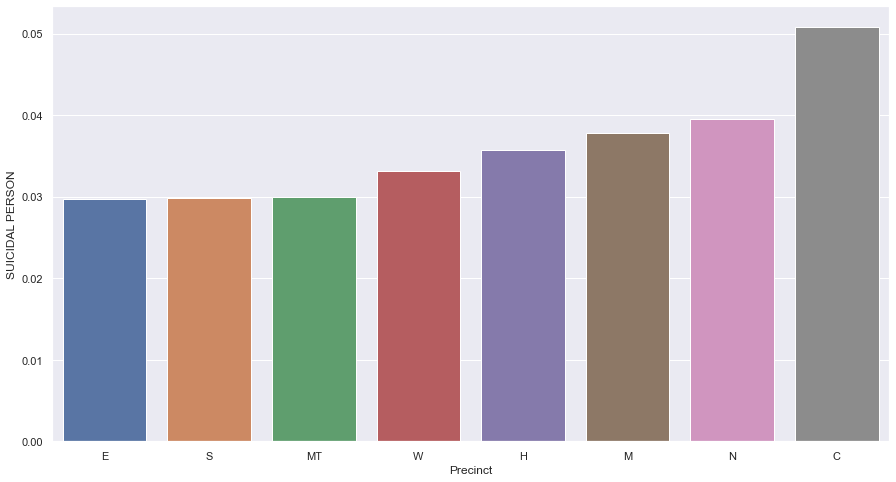

In [29]:
find_prop('SUICIDAL PERSON')

In [30]:
census_tracts = gpd.read_file('data/tl_2019_47_tract/tl_2019_47_tract.shp')

In [31]:
census_tracts

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,47,165,021002,47165021002,210.02,Census Tract 210.02,G5020,S,30654374,207994,+36.3521602,-086.6464309,"POLYGON ((-86.69927 36.32775, -86.69923 36.327..."
1,47,165,020901,47165020901,209.01,Census Tract 209.01,G5020,S,23811766,3412697,+36.3483143,-086.4070907,"POLYGON ((-86.43949 36.35962, -86.43915 36.359..."
2,47,165,020300,47165020300,203,Census Tract 203,G5020,S,14629292,0,+36.5796910,-086.5114955,"POLYGON ((-86.53716 36.56852, -86.53713 36.568..."
3,47,165,020902,47165020902,209.02,Census Tract 209.02,G5020,S,9756715,0,+36.3724350,-086.4411274,"POLYGON ((-86.47106 36.38238, -86.47081 36.382..."
4,47,165,020800,47165020800,208,Census Tract 208,G5020,S,10235406,37743,+36.4005117,-086.4528100,"POLYGON ((-86.48786 36.37320, -86.48783 36.373..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,47,157,022112,47157022112,221.12,Census Tract 221.12,G5020,S,3293232,0,+35.0282414,-090.0009887,"POLYGON ((-90.01257 35.02328, -90.01256 35.023..."
1493,47,073,050501,47073050501,505.01,Census Tract 505.01,G5020,S,83253173,0,+36.5659218,-082.7714427,"POLYGON ((-82.85011 36.54107, -82.84955 36.541..."
1494,47,073,050601,47073050601,506.01,Census Tract 506.01,G5020,S,23852225,177932,+36.5836443,-082.6318663,"POLYGON ((-82.68939 36.58793, -82.68936 36.588..."
1495,47,073,050602,47073050602,506.02,Census Tract 506.02,G5020,S,23381992,668716,+36.5467218,-082.6458382,"POLYGON ((-82.69446 36.54856, -82.69445 36.548..."


In [32]:
census_tracts_davidson = census_tracts[census_tracts.COUNTYFP == '037']

In [33]:
census_tracts_davidson = census_tracts_davidson[['TRACTCE', 'geometry']].rename(columns={'TRACTCE':'tract'})

In [34]:
census_tracts_davidson

,tract,geometry
27,010106,"POLYGON ((-86.83089 36.26570, -86.83016 36.265..."
36,010103,"POLYGON ((-86.91752 36.33976, -86.91747 36.339..."
37,010202,"POLYGON ((-86.82482 36.33225, -86.82480 36.332..."
38,010104,"POLYGON ((-86.97440 36.24991, -86.97244 36.252..."
63,013300,"POLYGON ((-86.86843 36.16436, -86.86836 36.164..."
...,...,...
1412,018905,"POLYGON ((-86.74457 36.05547, -86.74447 36.055..."
1413,013601,"POLYGON ((-86.84383 36.16325, -86.84375 36.163..."
1414,018301,"POLYGON ((-87.03820 36.09382, -87.03819 36.093..."
1415,018302,"POLYGON ((-87.05468 36.04997, -87.05438 36.049..."


<AxesSubplot:>

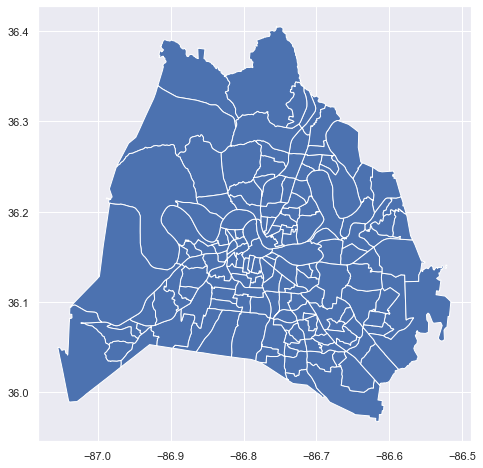

In [35]:
census_tracts_davidson.plot()

In [36]:
nashville_census_tracts = folium.Map(location = [36.174465, -86.767960], zoom_start = 10)

In [37]:
folium.GeoJson(census_tracts_davidson).add_to(nashville_census_tracts);

In [38]:
nashville_census_tracts

In [39]:
conn = sql.connect('data/census.sqlite')
cur = conn.cursor()

In [40]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;")
available_tables = (cur.fetchall())
available_tables

[('B01001',),
 ('B03002',),
 ('B11001',),
 ('B11002',),
 ('B15002',),
 ('B19001',),
 ('B19013',),
 ('B19301',),
 ('B25024',),
 ('B25075',),
 ('S1701',)]

In [41]:
query = '''
SELECT *
FROM B03002
'''

In [42]:
pop_by_race = pd.read_sql(query, conn)

In [43]:
pop_by_race

,index,GEO_ID,NAME,tract,county,state,variable,value,description
0,0,1400000US47037010103,"Census Tract 101.03, Davidson County, Tennessee",10103,37,47,B03002_001E,2533,Estimate!!Total:
1,1,1400000US47037010104,"Census Tract 101.04, Davidson County, Tennessee",10104,37,47,B03002_001E,2955,Estimate!!Total:
2,2,1400000US47037010105,"Census Tract 101.05, Davidson County, Tennessee",10105,37,47,B03002_001E,4435,Estimate!!Total:
3,3,1400000US47037010106,"Census Tract 101.06, Davidson County, Tennessee",10106,37,47,B03002_001E,3397,Estimate!!Total:
4,4,1400000US47037010201,"Census Tract 102.01, Davidson County, Tennessee",10201,37,47,B03002_001E,4157,Estimate!!Total:
...,...,...,...,...,...,...,...,...,...
3376,3376,1400000US47037019400,"Census Tract 194, Davidson County, Tennessee",19400,37,47,B03002_021E,0,Estimate!!Total:!!Hispanic or Latino:!!Two or ...
3377,3377,1400000US47037019500,"Census Tract 195, Davidson County, Tennessee",19500,37,47,B03002_021E,59,Estimate!!Total:!!Hispanic or Latino:!!Two or ...
3378,3378,1400000US47037019600,"Census Tract 196, Davidson County, Tennessee",19600,37,47,B03002_021E,14,Estimate!!Total:!!Hispanic or Latino:!!Two or ...
3379,3379,1400000US47037980100,"Census Tract 9801, Davidson County, Tennessee",980100,37,47,B03002_021E,0,Estimate!!Total:!!Hispanic or Latino:!!Two or ...


In [44]:
len(pop_by_race.tract.unique())

161

In [45]:
pop_by_race.county.value_counts()

37    3381
Name: county, dtype: int64

In [46]:
pop_by_race.variable.value_counts()

B03002_001E    161
B03002_012E    161
B03002_020E    161
B03002_019E    161
B03002_018E    161
B03002_017E    161
B03002_016E    161
B03002_015E    161
B03002_014E    161
B03002_013E    161
B03002_011E    161
B03002_002E    161
B03002_010E    161
B03002_009E    161
B03002_008E    161
B03002_007E    161
B03002_006E    161
B03002_005E    161
B03002_004E    161
B03002_003E    161
B03002_021E    161
Name: variable, dtype: int64

In [47]:
census_tracts_davidson.tract = census_tracts_davidson.tract.astype(int)

In [48]:
pop_by_race

,index,GEO_ID,NAME,tract,county,state,variable,value,description
0,0,1400000US47037010103,"Census Tract 101.03, Davidson County, Tennessee",10103,37,47,B03002_001E,2533,Estimate!!Total:
1,1,1400000US47037010104,"Census Tract 101.04, Davidson County, Tennessee",10104,37,47,B03002_001E,2955,Estimate!!Total:
2,2,1400000US47037010105,"Census Tract 101.05, Davidson County, Tennessee",10105,37,47,B03002_001E,4435,Estimate!!Total:
3,3,1400000US47037010106,"Census Tract 101.06, Davidson County, Tennessee",10106,37,47,B03002_001E,3397,Estimate!!Total:
4,4,1400000US47037010201,"Census Tract 102.01, Davidson County, Tennessee",10201,37,47,B03002_001E,4157,Estimate!!Total:
...,...,...,...,...,...,...,...,...,...
3376,3376,1400000US47037019400,"Census Tract 194, Davidson County, Tennessee",19400,37,47,B03002_021E,0,Estimate!!Total:!!Hispanic or Latino:!!Two or ...
3377,3377,1400000US47037019500,"Census Tract 195, Davidson County, Tennessee",19500,37,47,B03002_021E,59,Estimate!!Total:!!Hispanic or Latino:!!Two or ...
3378,3378,1400000US47037019600,"Census Tract 196, Davidson County, Tennessee",19600,37,47,B03002_021E,14,Estimate!!Total:!!Hispanic or Latino:!!Two or ...
3379,3379,1400000US47037980100,"Census Tract 9801, Davidson County, Tennessee",980100,37,47,B03002_021E,0,Estimate!!Total:!!Hispanic or Latino:!!Two or ...


In [49]:
pop_per_tract = pop_by_race[pop_by_race['variable'] == 'B03002_001E']
pop_per_tract

,index,GEO_ID,NAME,tract,county,state,variable,value,description
0,0,1400000US47037010103,"Census Tract 101.03, Davidson County, Tennessee",10103,37,47,B03002_001E,2533,Estimate!!Total:
1,1,1400000US47037010104,"Census Tract 101.04, Davidson County, Tennessee",10104,37,47,B03002_001E,2955,Estimate!!Total:
2,2,1400000US47037010105,"Census Tract 101.05, Davidson County, Tennessee",10105,37,47,B03002_001E,4435,Estimate!!Total:
3,3,1400000US47037010106,"Census Tract 101.06, Davidson County, Tennessee",10106,37,47,B03002_001E,3397,Estimate!!Total:
4,4,1400000US47037010201,"Census Tract 102.01, Davidson County, Tennessee",10201,37,47,B03002_001E,4157,Estimate!!Total:
...,...,...,...,...,...,...,...,...,...
156,156,1400000US47037019400,"Census Tract 194, Davidson County, Tennessee",19400,37,47,B03002_001E,5810,Estimate!!Total:
157,157,1400000US47037019500,"Census Tract 195, Davidson County, Tennessee",19500,37,47,B03002_001E,7956,Estimate!!Total:
158,158,1400000US47037019600,"Census Tract 196, Davidson County, Tennessee",19600,37,47,B03002_001E,3843,Estimate!!Total:
159,159,1400000US47037980100,"Census Tract 9801, Davidson County, Tennessee",980100,37,47,B03002_001E,0,Estimate!!Total:


In [50]:
census_tracts_davidson

,tract,geometry
27,10106,"POLYGON ((-86.83089 36.26570, -86.83016 36.265..."
36,10103,"POLYGON ((-86.91752 36.33976, -86.91747 36.339..."
37,10202,"POLYGON ((-86.82482 36.33225, -86.82480 36.332..."
38,10104,"POLYGON ((-86.97440 36.24991, -86.97244 36.252..."
63,13300,"POLYGON ((-86.86843 36.16436, -86.86836 36.164..."
...,...,...
1412,18905,"POLYGON ((-86.74457 36.05547, -86.74447 36.055..."
1413,13601,"POLYGON ((-86.84383 36.16325, -86.84375 36.163..."
1414,18301,"POLYGON ((-87.03820 36.09382, -87.03819 36.093..."
1415,18302,"POLYGON ((-87.05468 36.04997, -87.05438 36.049..."


In [51]:
pop_per_tract = pop_per_tract.merge(census_tracts_davidson, left_on='tract', right_on='tract')

In [52]:
pop_per_tract = pop_per_tract[['tract','value','geometry']]
pop_per_tract

,tract,value,geometry
0,10103,2533,"POLYGON ((-86.91752 36.33976, -86.91747 36.339..."
1,10104,2955,"POLYGON ((-86.97440 36.24991, -86.97244 36.252..."
2,10105,4435,"POLYGON ((-86.89144 36.26205, -86.89100 36.262..."
3,10106,3397,"POLYGON ((-86.83089 36.26570, -86.83016 36.265..."
4,10201,4157,"POLYGON ((-86.81736 36.27398, -86.81733 36.274..."
...,...,...,...
156,19400,5810,"POLYGON ((-86.80102 36.17745, -86.80100 36.177..."
157,19500,7956,"POLYGON ((-86.80272 36.15248, -86.80083 36.153..."
158,19600,3843,"POLYGON ((-86.76398 36.15376, -86.76368 36.153..."
159,980100,0,"POLYGON ((-86.70035 36.11833, -86.70019 36.118..."


In [53]:
query = '''
SELECT *
FROM B01001
'''

In [54]:
pop_by_age_sex = pd.read_sql(query, conn)

In [55]:
pop_by_age_sex

,index,GEO_ID,NAME,tract,county,state,variable,value,description
0,0,1400000US47037010103,"Census Tract 101.03, Davidson County, Tennessee",10103,37,47,B01001_001E,2533,Estimate!!Total:
1,1,1400000US47037010104,"Census Tract 101.04, Davidson County, Tennessee",10104,37,47,B01001_001E,2955,Estimate!!Total:
2,2,1400000US47037010105,"Census Tract 101.05, Davidson County, Tennessee",10105,37,47,B01001_001E,4435,Estimate!!Total:
3,3,1400000US47037010106,"Census Tract 101.06, Davidson County, Tennessee",10106,37,47,B01001_001E,3397,Estimate!!Total:
4,4,1400000US47037010201,"Census Tract 102.01, Davidson County, Tennessee",10201,37,47,B01001_001E,4157,Estimate!!Total:
...,...,...,...,...,...,...,...,...,...
7884,7884,1400000US47037019400,"Census Tract 194, Davidson County, Tennessee",19400,37,47,B01001_049E,53,Estimate!!Total:!!Female:!!85 years and over
7885,7885,1400000US47037019500,"Census Tract 195, Davidson County, Tennessee",19500,37,47,B01001_049E,0,Estimate!!Total:!!Female:!!85 years and over
7886,7886,1400000US47037019600,"Census Tract 196, Davidson County, Tennessee",19600,37,47,B01001_049E,68,Estimate!!Total:!!Female:!!85 years and over
7887,7887,1400000US47037980100,"Census Tract 9801, Davidson County, Tennessee",980100,37,47,B01001_049E,0,Estimate!!Total:!!Female:!!85 years and over


In [56]:
pop_per_tract_geo = gpd.GeoDataFrame(pop_per_tract, geometry='geometry', crs='epsg:4326')

In [57]:
centroid = pop_per_tract_geo.geometry.centroid

C:\Users\cocat\AppData\Local\Temp\ipykernel_25540\3154479239.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = pop_per_tract_geo.geometry.centroid


In [58]:
pop_per_tract_geo['centroid'] = centroid

In [59]:
pop_per_tract_geo

,tract,value,geometry,centroid
0,10103,2533,"POLYGON ((-86.91752 36.33976, -86.91747 36.339...",POINT (-86.86754 36.34794)
1,10104,2955,"POLYGON ((-86.97440 36.24991, -86.97244 36.252...",POINT (-86.88435 36.29623)
2,10105,4435,"POLYGON ((-86.89144 36.26205, -86.89100 36.262...",POINT (-86.85388 36.24885)
3,10106,3397,"POLYGON ((-86.83089 36.26570, -86.83016 36.265...",POINT (-86.80361 36.25371)
4,10201,4157,"POLYGON ((-86.81736 36.27398, -86.81733 36.274...",POINT (-86.77282 36.28825)
...,...,...,...,...
156,19400,5810,"POLYGON ((-86.80102 36.17745, -86.80100 36.177...",POINT (-86.79011 36.17774)
157,19500,7956,"POLYGON ((-86.80272 36.15248, -86.80083 36.153...",POINT (-86.78168 36.15764)
158,19600,3843,"POLYGON ((-86.76398 36.15376, -86.76368 36.153...",POINT (-86.72217 36.15383)
159,980100,0,"POLYGON ((-86.70035 36.11833, -86.70019 36.118...",POINT (-86.67811 36.12228)


In [60]:
precinct_outlines = gpd.read_file('data/Police Precinct District Outlines (GIS).geojson')

In [61]:
precinct_outlines

,precinct,shape_area,shape_len,geometry
0,CENTRAL,98541971.0257,46234.6717307,"MULTIPOLYGON (((-86.77525 36.14894, -86.77649 ..."
1,EAST,562260180.986,90261.1338967,"MULTIPOLYGON (((-86.74977 36.24057, -86.74955 ..."
2,HERMITAGE,2496337143.44,521944.947628,"MULTIPOLYGON (((-86.61306 36.24427, -86.61038 ..."
3,MADISON,1913402934.01,254564.86409,"MULTIPOLYGON (((-86.74955 36.24047, -86.74977 ..."
4,MIDTOWN-HILLS,1317030605.73,187104.273068,"MULTIPOLYGON (((-86.77935 36.14855, -86.77912 ..."
5,NORTH,3287881220.97,334895.629437,"MULTIPOLYGON (((-86.90742 36.39053, -86.90725 ..."
6,SOUTH,1936875931.39,422441.749973,"MULTIPOLYGON (((-86.63676 36.07248, -86.63664 ..."
7,WEST,3037053503.78,319947.055426,"MULTIPOLYGON (((-86.90759 36.13557, -86.90545 ..."


In [62]:
print(precinct_outlines.crs)

epsg:4326


In [63]:
pop_per_tract_geo = pop_per_tract_geo.to_crs(4326)

In [64]:
print(pop_per_tract_geo.crs)

epsg:4326


In [65]:
pop_per_tract_geo_point = pop_per_tract_geo.drop(columns = 'geometry').rename(columns = {'centroid':'geometry'})
pop_per_tract_geo_point

,tract,value,geometry
0,10103,2533,POINT (-86.86754 36.34794)
1,10104,2955,POINT (-86.88435 36.29623)
2,10105,4435,POINT (-86.85388 36.24885)
3,10106,3397,POINT (-86.80361 36.25371)
4,10201,4157,POINT (-86.77282 36.28825)
...,...,...,...
156,19400,5810,POINT (-86.79011 36.17774)
157,19500,7956,POINT (-86.78168 36.15764)
158,19600,3843,POINT (-86.72217 36.15383)
159,980100,0,POINT (-86.67811 36.12228)


In [66]:
pop_final = gpd.sjoin(pop_per_tract_geo_point, precinct_outlines)

In [67]:
pop_final = pop_final.groupby('precinct').sum('value').reset_index().replace(to_replace={'CENTRAL':'C','EAST':'E','HERMITAGE':'H','MADISON':'M','MIDTOWN-HILLS':'MT','NORTH':'N','SOUTH':'S','WEST':'W'})
pop_final

,precinct,tract,value,index_right
0,C,38800,11384,0
1,E,181603,58221,15
2,H,1377135,131296,54
3,M,169029,68766,48
4,MT,1479767,109790,116
5,N,235427,61731,90
6,S,485024,135666,168
7,W,443463,110634,182


In [68]:
pop_final[pop_final['precinct'] == 'EAST']['value'].sum()

0

In [69]:
precinct_summary

,Precinct,ASSIST EMS,DISORDERLY SUBJECT,DOMESTIC DISTURBANCE,INTOXICATED PERSON,MENTAL CONDITION,SUICIDAL PERSON,SUSPICIOUS PERSON,TRESPASSER,WELFARE CHECK,Total
0,C,1510,2734,99,73,171,349,171,1023,740,6870
1,CMD1,0,2,0,0,0,0,0,0,0,2
2,CMD2,0,0,0,0,0,0,0,0,1,1
3,CW,16,50,0,0,2,2,13,12,23,118
4,E,887,1457,324,29,110,131,290,291,889,4408
5,H,1569,2488,528,42,204,284,534,557,1751,7957
6,M,1119,1368,366,15,116,184,295,288,1116,4867
7,MT,1250,1938,259,53,141,179,417,557,1179,5973
8,N,1136,1765,347,14,218,218,290,432,1095,5515
9,PCW,3,0,0,0,1,0,0,0,0,4


In [70]:
precinct_summary = precinct_summary.loc[[0,4,5,6,7,8,10,11]]
precinct_summary = precinct_summary.merge(pop_final, left_on='Precinct', right_on='precinct')

In [71]:
precinct_summary = precinct_summary.drop(columns=['precinct','tract','index_right']).rename(columns={'value':'population'})
precinct_summary

,Precinct,ASSIST EMS,DISORDERLY SUBJECT,DOMESTIC DISTURBANCE,INTOXICATED PERSON,MENTAL CONDITION,SUICIDAL PERSON,SUSPICIOUS PERSON,TRESPASSER,WELFARE CHECK,Total,population
0,C,1510,2734,99,73,171,349,171,1023,740,6870,11384
1,E,887,1457,324,29,110,131,290,291,889,4408,58221
2,H,1569,2488,528,42,204,284,534,557,1751,7957,131296
3,M,1119,1368,366,15,116,184,295,288,1116,4867,68766
4,MT,1250,1938,259,53,141,179,417,557,1179,5973,109790
5,N,1136,1765,347,14,218,218,290,432,1095,5515,61731
6,S,1650,2548,559,44,190,237,417,553,1755,7953,135666
7,W,903,1218,179,28,113,141,370,310,996,4258,110634


In [72]:
precinct_summary_w_census = precinct_summary.copy()

In [73]:
def get_census(table, variable, description, append=False):
    
    query = f'''
    SELECT *
    FROM {table}
    '''

    census_table = pd.read_sql(query, conn)

    census_table_variable = census_table[census_table['variable'] == f'{variable}']

    census_table_variable_tracts = census_table_variable.merge(census_tracts_davidson, left_on='tract', right_on='tract')

    census_table_variable_tracts_subset = census_table_variable_tracts[['tract','value','geometry']]

    census_table_variable_tracts_subset_geo = gpd.GeoDataFrame(census_table_variable_tracts_subset, geometry='geometry', crs='epsg:4326')

    centroid = census_table_variable_tracts_subset_geo.geometry.centroid
    
    census_table_variable_tracts_subset_geo['centroid'] = centroid

    census_table_variable_tracts_subset_geo = census_table_variable_tracts_subset_geo.to_crs(4326)

    census_table_variable_tracts_subset_geo = census_table_variable_tracts_subset_geo.drop(columns = 'geometry').rename(columns = {'centroid':'geometry'})

    census_final = gpd.sjoin(census_table_variable_tracts_subset_geo, precinct_outlines)

    census_final = census_final.groupby('precinct').sum('value').reset_index().replace(to_replace={'CENTRAL':'C','EAST':'E','HERMITAGE':'H','MADISON':'M','MIDTOWN-HILLS':'MT','NORTH':'N','SOUTH':'S','WEST':'W'})

    precinct_summary_func = precinct_summary.merge(census_final, left_on='Precinct', right_on='precinct')

    precinct_summary_func = precinct_summary_func.drop(columns=['precinct','tract','index_right']).rename(columns={'value':f'{description}'})
    
    if append==True:
        precinct_summary_w_census.insert(loc=len(precinct_summary.columns), column=f'{description}', value=precinct_summary_func[f'{description}'])
        print('precinct_summary_w_census_APPENDED')
        return precinct_summary_w_census
        
    elif append==False:
        print('precinct_summary_func')
        return precinct_summary_func

In [74]:
get_census('B01001', 'B01001_002E', 'total_male', append=True)

C:\Users\cocat\AppData\Local\Temp\ipykernel_25540\1799193557.py:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = census_table_variable_tracts_subset_geo.geometry.centroid


precinct_summary_w_census_APPENDED


,Precinct,ASSIST EMS,DISORDERLY SUBJECT,DOMESTIC DISTURBANCE,INTOXICATED PERSON,MENTAL CONDITION,SUICIDAL PERSON,SUSPICIOUS PERSON,TRESPASSER,WELFARE CHECK,Total,population,total_male
0,C,1510,2734,99,73,171,349,171,1023,740,6870,11384,5996
1,E,887,1457,324,29,110,131,290,291,889,4408,58221,28436
2,H,1569,2488,528,42,204,284,534,557,1751,7957,131296,63814
3,M,1119,1368,366,15,116,184,295,288,1116,4867,68766,32516
4,MT,1250,1938,259,53,141,179,417,557,1179,5973,109790,52666
5,N,1136,1765,347,14,218,218,290,432,1095,5515,61731,26981
6,S,1650,2548,559,44,190,237,417,553,1755,7953,135666,68493
7,W,903,1218,179,28,113,141,370,310,996,4258,110634,52396


In [75]:
get_census('B01001', 'B01001_026E', 'total_female', append=True)

C:\Users\cocat\AppData\Local\Temp\ipykernel_25540\1799193557.py:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = census_table_variable_tracts_subset_geo.geometry.centroid


precinct_summary_w_census_APPENDED


,Precinct,ASSIST EMS,DISORDERLY SUBJECT,DOMESTIC DISTURBANCE,INTOXICATED PERSON,MENTAL CONDITION,SUICIDAL PERSON,SUSPICIOUS PERSON,TRESPASSER,WELFARE CHECK,Total,population,total_female,total_male
0,C,1510,2734,99,73,171,349,171,1023,740,6870,11384,5388,5996
1,E,887,1457,324,29,110,131,290,291,889,4408,58221,29785,28436
2,H,1569,2488,528,42,204,284,534,557,1751,7957,131296,67482,63814
3,M,1119,1368,366,15,116,184,295,288,1116,4867,68766,36250,32516
4,MT,1250,1938,259,53,141,179,417,557,1179,5973,109790,57124,52666
5,N,1136,1765,347,14,218,218,290,432,1095,5515,61731,34750,26981
6,S,1650,2548,559,44,190,237,417,553,1755,7953,135666,67173,68493
7,W,903,1218,179,28,113,141,370,310,996,4258,110634,58238,52396


In [76]:
precinct_summary_w_census['sanity_check'] = precinct_summary_w_census['total_male'] + precinct_summary_w_census['total_female']

In [77]:
precinct_summary_w_census

,Precinct,ASSIST EMS,DISORDERLY SUBJECT,DOMESTIC DISTURBANCE,INTOXICATED PERSON,MENTAL CONDITION,SUICIDAL PERSON,SUSPICIOUS PERSON,TRESPASSER,WELFARE CHECK,Total,population,total_female,total_male,sanity_check
0,C,1510,2734,99,73,171,349,171,1023,740,6870,11384,5388,5996,11384
1,E,887,1457,324,29,110,131,290,291,889,4408,58221,29785,28436,58221
2,H,1569,2488,528,42,204,284,534,557,1751,7957,131296,67482,63814,131296
3,M,1119,1368,366,15,116,184,295,288,1116,4867,68766,36250,32516,68766
4,MT,1250,1938,259,53,141,179,417,557,1179,5973,109790,57124,52666,109790
5,N,1136,1765,347,14,218,218,290,432,1095,5515,61731,34750,26981,61731
6,S,1650,2548,559,44,190,237,417,553,1755,7953,135666,67173,68493,135666
7,W,903,1218,179,28,113,141,370,310,996,4258,110634,58238,52396,110634


In [78]:
precinct_summary_w_census[precinct_summary_w_census['population'] == precinct_summary_w_census['sanity_check']]

,Precinct,ASSIST EMS,DISORDERLY SUBJECT,DOMESTIC DISTURBANCE,INTOXICATED PERSON,MENTAL CONDITION,SUICIDAL PERSON,SUSPICIOUS PERSON,TRESPASSER,WELFARE CHECK,Total,population,total_female,total_male,sanity_check
0,C,1510,2734,99,73,171,349,171,1023,740,6870,11384,5388,5996,11384
1,E,887,1457,324,29,110,131,290,291,889,4408,58221,29785,28436,58221
2,H,1569,2488,528,42,204,284,534,557,1751,7957,131296,67482,63814,131296
3,M,1119,1368,366,15,116,184,295,288,1116,4867,68766,36250,32516,68766
4,MT,1250,1938,259,53,141,179,417,557,1179,5973,109790,57124,52666,109790
5,N,1136,1765,347,14,218,218,290,432,1095,5515,61731,34750,26981,61731
6,S,1650,2548,559,44,190,237,417,553,1755,7953,135666,67173,68493,135666
7,W,903,1218,179,28,113,141,370,310,996,4258,110634,58238,52396,110634


In [79]:
precinct_summary_w_census = precinct_summary.copy()

In [80]:
precinct_summary_w_census

,Precinct,ASSIST EMS,DISORDERLY SUBJECT,DOMESTIC DISTURBANCE,INTOXICATED PERSON,MENTAL CONDITION,SUICIDAL PERSON,SUSPICIOUS PERSON,TRESPASSER,WELFARE CHECK,Total,population
0,C,1510,2734,99,73,171,349,171,1023,740,6870,11384
1,E,887,1457,324,29,110,131,290,291,889,4408,58221
2,H,1569,2488,528,42,204,284,534,557,1751,7957,131296
3,M,1119,1368,366,15,116,184,295,288,1116,4867,68766
4,MT,1250,1938,259,53,141,179,417,557,1179,5973,109790
5,N,1136,1765,347,14,218,218,290,432,1095,5515,61731
6,S,1650,2548,559,44,190,237,417,553,1755,7953,135666
7,W,903,1218,179,28,113,141,370,310,996,4258,110634


In [81]:
get_census('B19001', 'B19001_002E', 'less_than_10000')

C:\Users\cocat\AppData\Local\Temp\ipykernel_25540\1799193557.py:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = census_table_variable_tracts_subset_geo.geometry.centroid


precinct_summary_func


,Precinct,ASSIST EMS,DISORDERLY SUBJECT,DOMESTIC DISTURBANCE,INTOXICATED PERSON,MENTAL CONDITION,SUICIDAL PERSON,SUSPICIOUS PERSON,TRESPASSER,WELFARE CHECK,Total,population,less_than_10000
0,C,1510,2734,99,73,171,349,171,1023,740,6870,11384,1000
1,E,887,1457,324,29,110,131,290,291,889,4408,58221,1184
2,H,1569,2488,528,42,204,284,534,557,1751,7957,131296,2410
3,M,1119,1368,366,15,116,184,295,288,1116,4867,68766,1779
4,MT,1250,1938,259,53,141,179,417,557,1179,5973,109790,2351
5,N,1136,1765,347,14,218,218,290,432,1095,5515,61731,3048
6,S,1650,2548,559,44,190,237,417,553,1755,7953,135666,2757
7,W,903,1218,179,28,113,141,370,310,996,4258,110634,2076


In [82]:
precinct_summary_w_census

,Precinct,ASSIST EMS,DISORDERLY SUBJECT,DOMESTIC DISTURBANCE,INTOXICATED PERSON,MENTAL CONDITION,SUICIDAL PERSON,SUSPICIOUS PERSON,TRESPASSER,WELFARE CHECK,Total,population
0,C,1510,2734,99,73,171,349,171,1023,740,6870,11384
1,E,887,1457,324,29,110,131,290,291,889,4408,58221
2,H,1569,2488,528,42,204,284,534,557,1751,7957,131296
3,M,1119,1368,366,15,116,184,295,288,1116,4867,68766
4,MT,1250,1938,259,53,141,179,417,557,1179,5973,109790
5,N,1136,1765,347,14,218,218,290,432,1095,5515,61731
6,S,1650,2548,559,44,190,237,417,553,1755,7953,135666
7,W,903,1218,179,28,113,141,370,310,996,4258,110634


In [83]:
def chart_census(x):
    sns.set(rc = {'figure.figsize':(15,8)})
    sns.barplot(x=precinct_summary_w_census['Precinct'], y=precinct_summary_w_census[x], order=precinct_summary_w_census.sort_values(x, ascending=False).Precinct);

In [84]:
get_census('B19001', 'B19001_002E', 'less_than_10000', append=True)

C:\Users\cocat\AppData\Local\Temp\ipykernel_25540\1799193557.py:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = census_table_variable_tracts_subset_geo.geometry.centroid


precinct_summary_w_census_APPENDED


,Precinct,ASSIST EMS,DISORDERLY SUBJECT,DOMESTIC DISTURBANCE,INTOXICATED PERSON,MENTAL CONDITION,SUICIDAL PERSON,SUSPICIOUS PERSON,TRESPASSER,WELFARE CHECK,Total,population,less_than_10000
0,C,1510,2734,99,73,171,349,171,1023,740,6870,11384,1000
1,E,887,1457,324,29,110,131,290,291,889,4408,58221,1184
2,H,1569,2488,528,42,204,284,534,557,1751,7957,131296,2410
3,M,1119,1368,366,15,116,184,295,288,1116,4867,68766,1779
4,MT,1250,1938,259,53,141,179,417,557,1179,5973,109790,2351
5,N,1136,1765,347,14,218,218,290,432,1095,5515,61731,3048
6,S,1650,2548,559,44,190,237,417,553,1755,7953,135666,2757
7,W,903,1218,179,28,113,141,370,310,996,4258,110634,2076


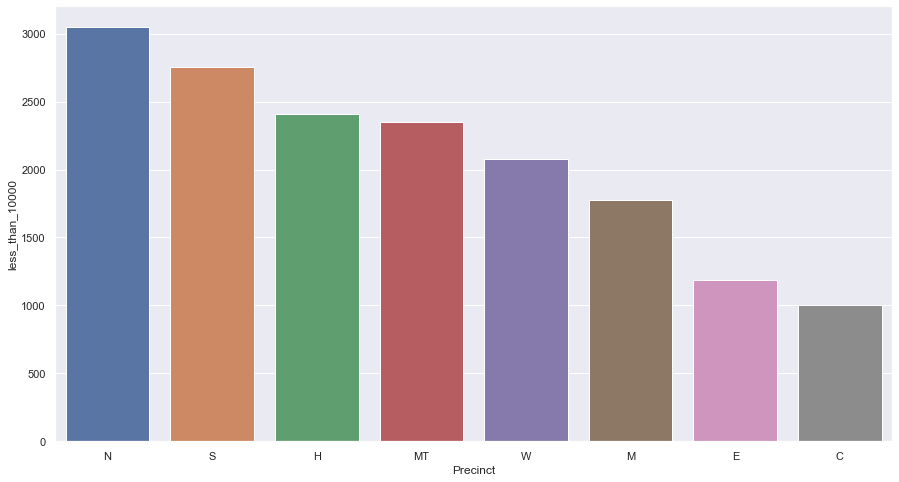

In [85]:
chart_census('less_than_10000')

In [86]:
precinct_summary_w_census = precinct_summary.copy()

In [87]:
precinct_summary_w_census['Calls Per Capita'] = precinct_summary_w_census['Total'] / precinct_summary_w_census['population']
precinct_summary_w_census

,Precinct,ASSIST EMS,DISORDERLY SUBJECT,DOMESTIC DISTURBANCE,INTOXICATED PERSON,MENTAL CONDITION,SUICIDAL PERSON,SUSPICIOUS PERSON,TRESPASSER,WELFARE CHECK,Total,population,Calls Per Capita
0,C,1510,2734,99,73,171,349,171,1023,740,6870,11384,0.603479
1,E,887,1457,324,29,110,131,290,291,889,4408,58221,0.075712
2,H,1569,2488,528,42,204,284,534,557,1751,7957,131296,0.060604
3,M,1119,1368,366,15,116,184,295,288,1116,4867,68766,0.070776
4,MT,1250,1938,259,53,141,179,417,557,1179,5973,109790,0.054404
5,N,1136,1765,347,14,218,218,290,432,1095,5515,61731,0.089339
6,S,1650,2548,559,44,190,237,417,553,1755,7953,135666,0.058622
7,W,903,1218,179,28,113,141,370,310,996,4258,110634,0.038487


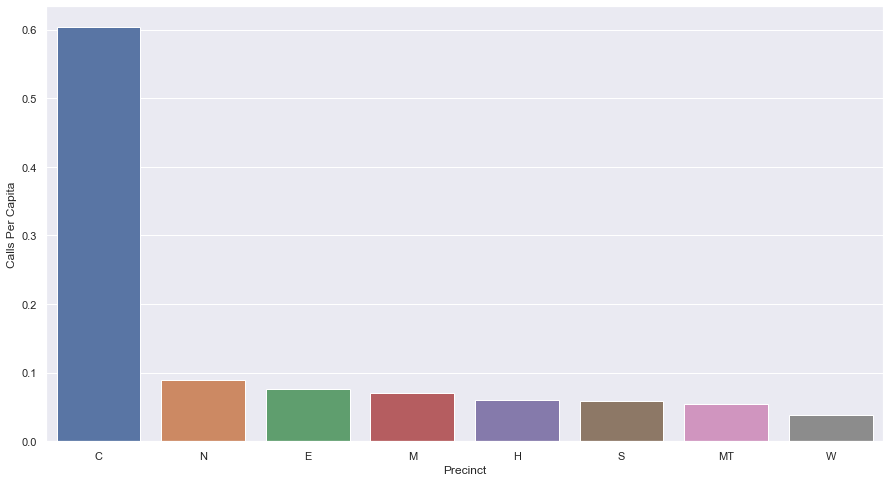

In [88]:
chart_census('Calls Per Capita')

In [89]:
precinct_summary_w_census = precinct_summary.copy()

In [90]:
precinct_summary_w_census

,Precinct,ASSIST EMS,DISORDERLY SUBJECT,DOMESTIC DISTURBANCE,INTOXICATED PERSON,MENTAL CONDITION,SUICIDAL PERSON,SUSPICIOUS PERSON,TRESPASSER,WELFARE CHECK,Total,population
0,C,1510,2734,99,73,171,349,171,1023,740,6870,11384
1,E,887,1457,324,29,110,131,290,291,889,4408,58221
2,H,1569,2488,528,42,204,284,534,557,1751,7957,131296
3,M,1119,1368,366,15,116,184,295,288,1116,4867,68766
4,MT,1250,1938,259,53,141,179,417,557,1179,5973,109790
5,N,1136,1765,347,14,218,218,290,432,1095,5515,61731
6,S,1650,2548,559,44,190,237,417,553,1755,7953,135666
7,W,903,1218,179,28,113,141,370,310,996,4258,110634


In [91]:
get_census('B19001', 'B19001_002E', 'Less Than $10,000', append=True)

C:\Users\cocat\AppData\Local\Temp\ipykernel_25540\1799193557.py:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = census_table_variable_tracts_subset_geo.geometry.centroid


precinct_summary_w_census_APPENDED


,Precinct,ASSIST EMS,DISORDERLY SUBJECT,DOMESTIC DISTURBANCE,INTOXICATED PERSON,MENTAL CONDITION,SUICIDAL PERSON,SUSPICIOUS PERSON,TRESPASSER,WELFARE CHECK,Total,population,"Less Than $10,000"
0,C,1510,2734,99,73,171,349,171,1023,740,6870,11384,1000
1,E,887,1457,324,29,110,131,290,291,889,4408,58221,1184
2,H,1569,2488,528,42,204,284,534,557,1751,7957,131296,2410
3,M,1119,1368,366,15,116,184,295,288,1116,4867,68766,1779
4,MT,1250,1938,259,53,141,179,417,557,1179,5973,109790,2351
5,N,1136,1765,347,14,218,218,290,432,1095,5515,61731,3048
6,S,1650,2548,559,44,190,237,417,553,1755,7953,135666,2757
7,W,903,1218,179,28,113,141,370,310,996,4258,110634,2076


In [92]:
precinct_summary_w_census['Percent of Individuals Living in a Household w/ Income Less Than $10,000'] = precinct_summary_w_census['Total'] / precinct_summary_w_census['Less Than $10,000']


In [93]:
precinct_summary_w_census

,Precinct,ASSIST EMS,DISORDERLY SUBJECT,DOMESTIC DISTURBANCE,INTOXICATED PERSON,MENTAL CONDITION,SUICIDAL PERSON,SUSPICIOUS PERSON,TRESPASSER,WELFARE CHECK,Total,population,"Less Than $10,000","Percent of Individuals Living in a Household w/ Income Less Than $10,000"
0,C,1510,2734,99,73,171,349,171,1023,740,6870,11384,1000,6.870000
1,E,887,1457,324,29,110,131,290,291,889,4408,58221,1184,3.722973
2,H,1569,2488,528,42,204,284,534,557,1751,7957,131296,2410,3.301660
3,M,1119,1368,366,15,116,184,295,288,1116,4867,68766,1779,2.735807
4,MT,1250,1938,259,53,141,179,417,557,1179,5973,109790,2351,2.540621
5,N,1136,1765,347,14,218,218,290,432,1095,5515,61731,3048,1.809383
6,S,1650,2548,559,44,190,237,417,553,1755,7953,135666,2757,2.884657
7,W,903,1218,179,28,113,141,370,310,996,4258,110634,2076,2.051060


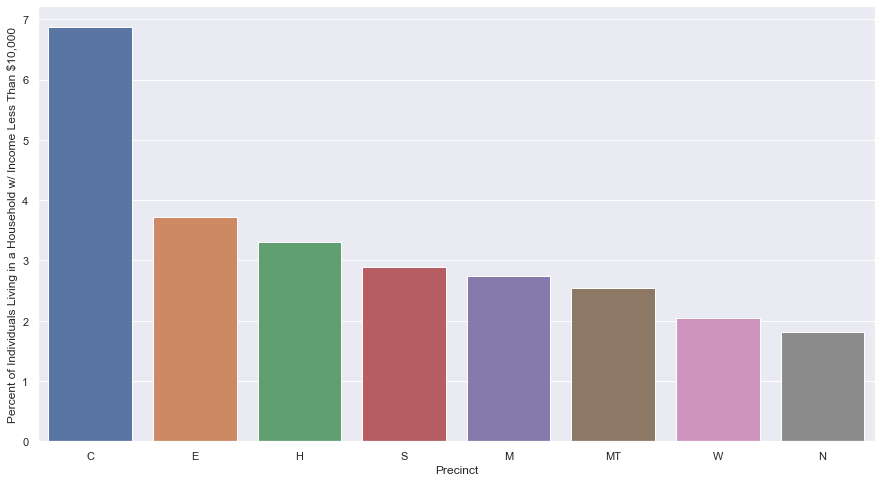

In [94]:
chart_census('Percent of Individuals Living in a Household w/ Income Less Than $10,000')